In [1]:
#@title import packages

import gunpowder as gp
import h5py
import io
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import requests
import torch
import waterz
import zarr

from funlib.learn.torch.models import UNet, ConvPass
from gunpowder.torch import Predict
from scipy.ndimage import label, measurements
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import distance_transform_edt
from skimage.segmentation import watershed

%matplotlib inline
logging.basicConfig(level=logging.INFO)

/home1/09699/anforsm/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_1033619/2871270234.py:20: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter
/tmp/ipykernel_1033619/2871270234.py:21: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import distance_transform_edt


In [38]:
f = zarr.open("../../oblique_prediction.zarr")

In [40]:
f = f["preds/affs"]

In [45]:
f[0,0,1,0]

123.8295

In [19]:
affs = np.load("affs.npy")
frags = np.load("frags.npy")

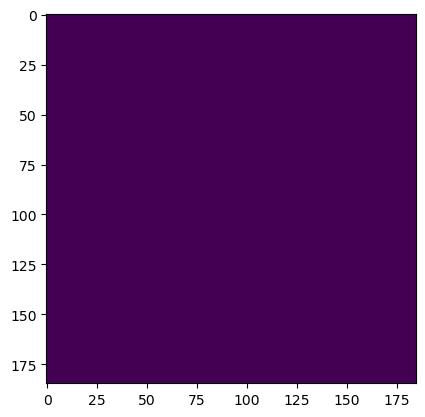

In [24]:
plt.imshow(frags[4])

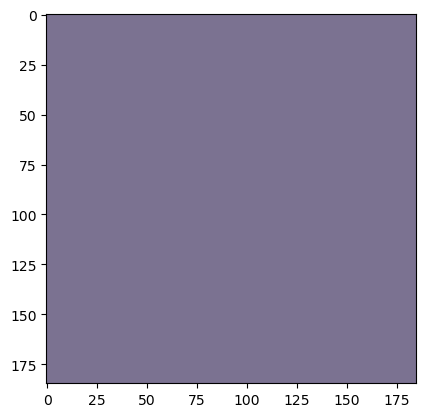

In [18]:
plt.imshow(affs[:,0,:,:].transpose((1, 2, 0)).astype(np.uint8))

In [ ]:
generator = waterz.agglomerate(
        affs=affs,
        thresholds=[0, threshold],
        fragments=frags,
        scoring_function=merge_function,
        discretize_queue=256,
        return_merge_history=True,
        return_region_graph=True)